# Análisis y visualización de datos | Lorenzo Tomás Diez
## Actividad 3
### Situación
- Ahora que tenés las tablas listas para usar, avanzás en empezar a construir gráficos para el informe. En la práctica se suelen generar distintas opciones (es un proceso iterativo de prueba y error), y después se eligen algunas de estas para la versión final del entregable.
- En esta parte vas a generar algunas visualizaciones usando Matplotlib y Seaborn, dentro de Juypter.
### Requerimientos
- Para realizar esta actividad descargá el archivo ZIP, que encontrarás en la plataforma al final de este documento.
### Consignas
1. Teniendo en cuenta todas las bases disponibles, elegí algunas variables y construí tres visualizaciones.
- Una que muestre la distribución de una variable (ejemplo: histograma, boxplot, violinplot).
- Una que muestre la relación entre dos variables (ejemplo: diagrama de dispersión).
- Otra a elección (ejemplo: evolución en el tiempo, panel).
2. Deberás entregar la consigna en un archivo PDF creado en PowerPoint o Word, con las visualizaciones que generaste y el código que las generó. Al pie de cada gráfico incluí algún comentario breve sobre el contenido del gráfico, y sobre la importancia de lo que se observa en él. Podés agregar cualquier otro comentario o anotación que creas necesario. Cada sección o gráfico debe incluir sus títulos (debe poder leerse e interpretarse por sí mismo).
- Al igual que en los ejemplos anteriores, tené en cuenta que cada visualización debería tener un foco y un mensaje claro. Te puede servir hacer un borrador en papel antes de construirla en Python.
### Entrega
- ¡Llegaste al final de la actividad de este módulo! Recordá guardar tus respuestas y luego subirlas clickeando en el botón "Enviar tarea".
- Recordá que podés consultar tus dudas con tus compañeros en el foro de la materia.

### Resolución Item 1
- Setup del proyecto
- Seteo de locale para que el mes sea legible

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_empleo = pd.read_csv('../ARCHIVOS/empleo.csv', encoding='latin-1')
df_poblacion = pd.read_csv('../ARCHIVOS/poblacion.csv', encoding='latin-1')

- Análisis de la base de datos seleccionada: tipos de datos, valores nulos, columnas y filas

In [21]:
df_empleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   provincia                    3696 non-null   object 
 1   anio                         3696 non-null   int64  
 2   mes                          3696 non-null   object 
 3   empleados_registrados_miles  3696 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 115.6+ KB


In [22]:
df_empleo.head()

,provincia,anio,mes,empleados_registrados_miles
0,Buenos Aires,2009,ene-09,1787.640
1,Buenos Aires,2009,feb-09,1769.223
2,Buenos Aires,2009,mar-09,1745.913
3,Buenos Aires,2009,abr-09,1729.917
4,Buenos Aires,2009,may-09,1723.218


In [23]:
df_empleo.describe()

,anio,empleados_registrados_miles
count,3696.000000,3696.000000
mean,2014.922078,251.029042
std,3.702961,457.131354
min,2009.000000,20.594000
25%,2012.000000,51.388750
50%,2015.000000,86.432500
75%,2018.000000,141.495250
max,2021.000000,1995.292000


- Se puede observar que `anio` es de tipo int. Y que tambien tenemos `mes` como una columna separada. Vamos a crear una nueva columna llamada `fecha` que concatene el año y el mes.

- Observamos que el mes viene como un string abreviado. Vamos a crear una nueva columna que convierta el mes a un formato numérico. Y para eso verificamos que esto sea posible imprimiendo los valores únicos de la columna `mes`.

In [24]:
df_empleo['mes'] = df_empleo['mes'].apply(lambda x: x.lower())
df_empleo['mes'].unique()

array(['ene-09', 'feb-09', 'mar-09', 'abr-09', 'may-09', 'jun-09',
       'jul-09', 'ago-09', 'sep-09', 'oct-09', 'nov-09', 'dic-09',
       'ene-10', 'feb-10', 'mar-10', 'abr-10', 'may-10', 'jun-10',
       'jul-10', 'ago-10', 'sep-10', 'oct-10', 'nov-10', 'dic-10',
       'ene-11', 'feb-11', 'mar-11', 'abr-11', 'may-11', 'jun-11',
       'jul-11', 'ago-11', 'sep-11', 'oct-11', 'nov-11', 'dic-11',
       'ene-12', 'feb-12', 'mar-12', 'abr-12', 'may-12', 'jun-12',
       'jul-12', 'ago-12', 'sep-12', 'oct-12', 'nov-12', 'dic-12',
       'ene-13', 'feb-13', 'mar-13', 'abr-13', 'may-13', 'jun-13',
       'jul-13', 'ago-13', 'sep-13', 'oct-13', 'nov-13', 'dic-13',
       'ene-14', 'feb-14', 'mar-14', 'abr-14', 'may-14', 'jun-14',
       'jul-14', 'ago-14', 'sep-14', 'oct-14', 'nov-14', 'dic-14',
       'ene-15', 'feb-15', 'mar-15', 'abr-15', 'may-15', 'jun-15',
       'jul-15', 'ago-15', 'sep-15', 'oct-15', 'nov-15', 'dic-15',
       'ene-16', 'feb-16', 'mar-16', 'abr-16', 'may-16', 'jun-

In [25]:

traductor_de_meses = {
  'ene': '01',
  'feb': '02',
  'mar': '03',
  'abr': '04',
  'may': '05',
  'jun': '06',
  'jul': '07',
  'ago': '08',
  'sep': '09',
  'oct': '10',
  'nov': '11',
  'dic': '12'
}

def mes_a_numero(mes):
  mes_split = mes.split('-')
  return traductor_de_meses[mes_split[0]]+ '-' + mes_split[1]

df_empleo['mes'] = df_empleo['mes'].apply(lambda x: mes_a_numero(x)) 
df_empleo['fecha'] = df_empleo['anio'].astype(str) + '-' + df_empleo['mes'].astype(str)
df_empleo['fecha'] = pd.to_datetime(df_empleo['fecha'], format='%Y-%m-%d')
df_empleo.head()

,provincia,anio,mes,empleados_registrados_miles,fecha
0,Buenos Aires,2009,01-09,1787.640,2009-01-09
1,Buenos Aires,2009,02-09,1769.223,2009-02-09
2,Buenos Aires,2009,03-09,1745.913,2009-03-09
3,Buenos Aires,2009,04-09,1729.917,2009-04-09
4,Buenos Aires,2009,05-09,1723.218,2009-05-09


- Vamos a eliminar las columnas `anio` y `mes` ya que no las usaremos. Usamos drop para eliminar las columnas y inplace=True para que se guarden los cambios en el dataframe.

In [26]:
df_empleo['provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

- Vamos a analizar la base de población.

In [27]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   provincia          775 non-null    object
 1   anio               775 non-null    int64 
 2   poblacion_total    775 non-null    int64 
 3   poblacion_varones  775 non-null    int64 
 4   poblacion_mujeres  775 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 30.4+ KB


In [28]:
df_poblacion.head()


,provincia,anio,poblacion_total,poblacion_varones,poblacion_mujeres
0,Total País,2010,40788453,19940704,20847749
1,Total País,2011,41261490,20180791,21080699
2,Total País,2012,41733271,20420391,21312880
3,Total País,2013,42202935,20659037,21543898
4,Total País,2014,42669500,20896203,21773297


In [29]:
df_poblacion['provincia'].unique()

array(['Total País', 'Capital Federal', 'Buenos Aires', 'Catamarca',
       'Córdoba', 'Corrientes', 'Chaco', 'Chubut', 'Entre Ríos',
       'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
       'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán',
       'Tierra del Fuego'], dtype=object)

In [30]:

df_poblacion.drop(df_poblacion[df_poblacion['provincia'] == 'Total País'].index, inplace=True)
df_poblacion.head()


,provincia,anio,poblacion_total,poblacion_varones,poblacion_mujeres
31,Capital Federal,2010,3028481,1405566,1622915
32,Capital Federal,2011,3033639,1409835,1623804
33,Capital Federal,2012,3038860,1414105,1624755
34,Capital Federal,2013,3044076,1418339,1625737
35,Capital Federal,2014,3049229,1422507,1626722


In [31]:
df_poblacion.drop(df_poblacion[df_poblacion['provincia'] == 'Total País'].index, inplace=True)
df_poblacion.head()

,provincia,anio,poblacion_total,poblacion_varones,poblacion_mujeres
31,Capital Federal,2010,3028481,1405566,1622915
32,Capital Federal,2011,3033639,1409835,1623804
33,Capital Federal,2012,3038860,1414105,1624755
34,Capital Federal,2013,3044076,1418339,1625737
35,Capital Federal,2014,3049229,1422507,1626722


- Vamos a hacer un merge entre las bases de empleo y poblacion teniendo en cuenta la columna `provincia` y `anio`

In [32]:
df_empleo_poblacion = pd.merge(df_empleo, df_poblacion[['poblacion_total', 'provincia', 'anio']], 
                               on=['provincia', 'anio'], 
                               how='left', 
                               indicator=True)
df_empleo_poblacion.loc[df_empleo_poblacion['_merge'] == 'left_only', 'poblacion_total'] = 0
df_empleo_poblacion.head()

,provincia,anio,mes,empleados_registrados_miles,fecha,poblacion_total,_merge
0,Buenos Aires,2009,01-09,1787.640,2009-01-09,0.0,left_only
1,Buenos Aires,2009,02-09,1769.223,2009-02-09,0.0,left_only
2,Buenos Aires,2009,03-09,1745.913,2009-03-09,0.0,left_only
3,Buenos Aires,2009,04-09,1729.917,2009-04-09,0.0,left_only
4,Buenos Aires,2009,05-09,1723.218,2009-05-09,0.0,left_only


- Tenemos que remover las filas que no tienen población total. Y para eso vamos a usar un filtrado.

In [33]:
df_empleo_poblacion = df_empleo_poblacion[df_empleo_poblacion['poblacion_total'] > 0]
df_empleo_poblacion[df_empleo_poblacion['poblacion_total'] <= 0].count()

provincia                      0
anio                           0
mes                            0
empleados_registrados_miles    0
fecha                          0
poblacion_total                0
_merge                         0
dtype: int64

- Ahora vamos a eliminar las columnas `anio` y `mes` ya que no las necesitamos mas.

In [34]:
df_empleo_poblacion.drop(columns=['anio', 'mes'], inplace=True)
df_empleo_poblacion.head()

,provincia,empleados_registrados_miles,fecha,poblacion_total,_merge
12,Buenos Aires,1786.437,2010-01-10,15716942.0,both
13,Buenos Aires,1782.964,2010-02-10,15716942.0,both
14,Buenos Aires,1773.732,2010-03-10,15716942.0,both
15,Buenos Aires,1769.101,2010-04-10,15716942.0,both
16,Buenos Aires,1767.656,2010-05-10,15716942.0,both


### Distribución de una variable: Empleados Registrados en Miles / Provincia

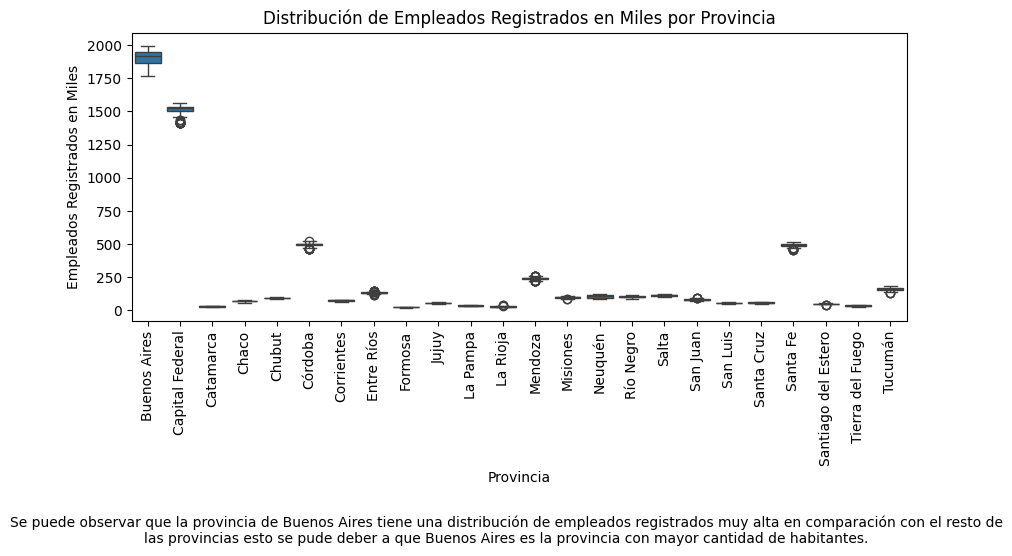

In [35]:
x = df_empleo_poblacion['provincia']
y = df_empleo_poblacion['empleados_registrados_miles']

plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y)
plt.xticks(rotation=90)
plt.title('Distribución de Empleados Registrados en Miles por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Empleados Registrados en Miles')
plt.subplots_adjust(bottom=0.4)
plt.figtext(0.5, 0.05, 'Se puede observar que la provincia de Buenos Aires tiene una distribución de empleados registrados muy alta en comparación con el resto de las provincias esto se pude deber a que Buenos Aires es la provincia con mayor cantidad de habitantes.', ha='center', va='center', wrap=True)
plt.show()

### Relación entre dos variables: `Empleados registrados en miles` vs `Fecha` para una `Provincia`

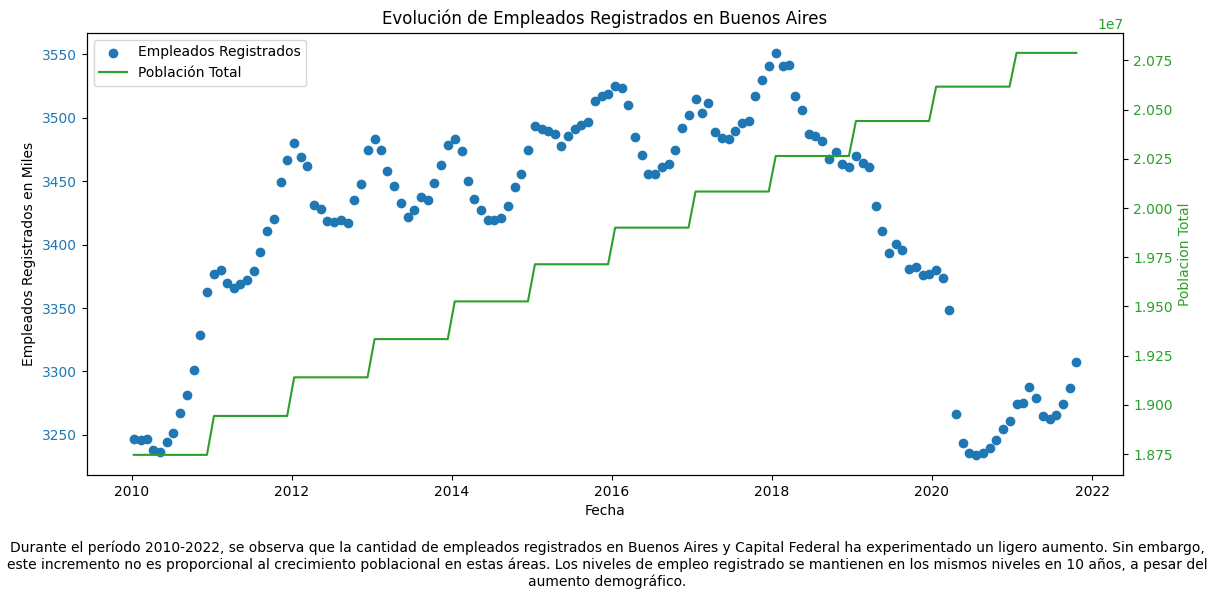

In [36]:
df_buenos_aires = df_empleo_poblacion[df_empleo_poblacion['provincia'].isin(['Buenos Aires', 'Capital Federal'])].groupby('fecha').agg({'empleados_registrados_miles': 'sum', 'poblacion_total': 'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Empleados Registrados en Miles')
ax1.scatter(df_buenos_aires['fecha'], df_buenos_aires['empleados_registrados_miles'], color='tab:blue', label='Empleados Registrados')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Poblacion Total', color='tab:green')
ax2.plot(df_buenos_aires['fecha'], df_buenos_aires['poblacion_total'], color='tab:green', label='Población Total')
ax2.tick_params(axis='y', labelcolor='tab:green')


plt.title('Evolución de Empleados Registrados en Buenos Aires')
fig.tight_layout()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.05, 'Durante el período 2010-2022, se observa que la cantidad de empleados registrados en Buenos Aires y Capital Federal ha experimentado un ligero aumento. Sin embargo, este incremento no es proporcional al crecimiento poblacional en estas áreas. Los niveles de empleo registrado se mantienen en los mismos niveles en 10 años, a pesar del aumento demográfico.', ha='center', va='center', wrap=True)
plt.show()


### Otra visualización a eleccion: Evolucion en el tiempo de `Empleados registrados` para multiples `regiones`

- Vamos a crear regiones que representan grupos de provincia y como evoluciono el empleo registrado en cada una de ellas.

```
       ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán']
```

In [37]:

regiones = {
  "NOA":{
    "nombre": 'Noroeste argentino',
    "provincias": ['Tucumán', 'Catamarca', 'Santiago del Estero', 'Salta', 'Jujuy'],
    "color": "#1f77b4"
  },
  "NEA":{
    "nombre": 'Noreste argentino',
    "provincias": ['Corrientes', 'Misiones', 'Formosa', 'Chaco'],
    "color": "#ff7f0e"
  },
  "Cuyo":{
    "nombre": 'Cuyo',
    "provincias": ['San Luis', 'La Rioja', 'Mendoza', 'San Juan'],
    "color": "#2ca02c"
  },
  "Centro":{
    "nombre": 'Centro',
    "provincias": ['Santa Fe', 'Córdoba', 'Entre Ríos'],
    "color": "#d62728"
  },
  "BSAS":{
    "nombre": 'Buenos Aires',
    "provincias": ['Buenos Aires', 'Capital Federal'],
    "color": "#9467bd"
  },
  "Patagonia":{
    "nombre": 'Patagonia',
    "provincias": ['Chubut', 'Río Negro', 'Neuquén', 'Santa Cruz', 'Tierra del Fuego', 'La Pampa'],
    "color": "#8c564b"
  }
}

df_empleo_poblacion['region'] = df_empleo_poblacion['provincia'].apply(
  lambda x: next((key for key, region in regiones.items() if x in region['provincias']), 'Otros')
)
df_empleo_poblacion['region'].unique()


array(['BSAS', 'NOA', 'NEA', 'Patagonia', 'Centro', 'Cuyo'], dtype=object)

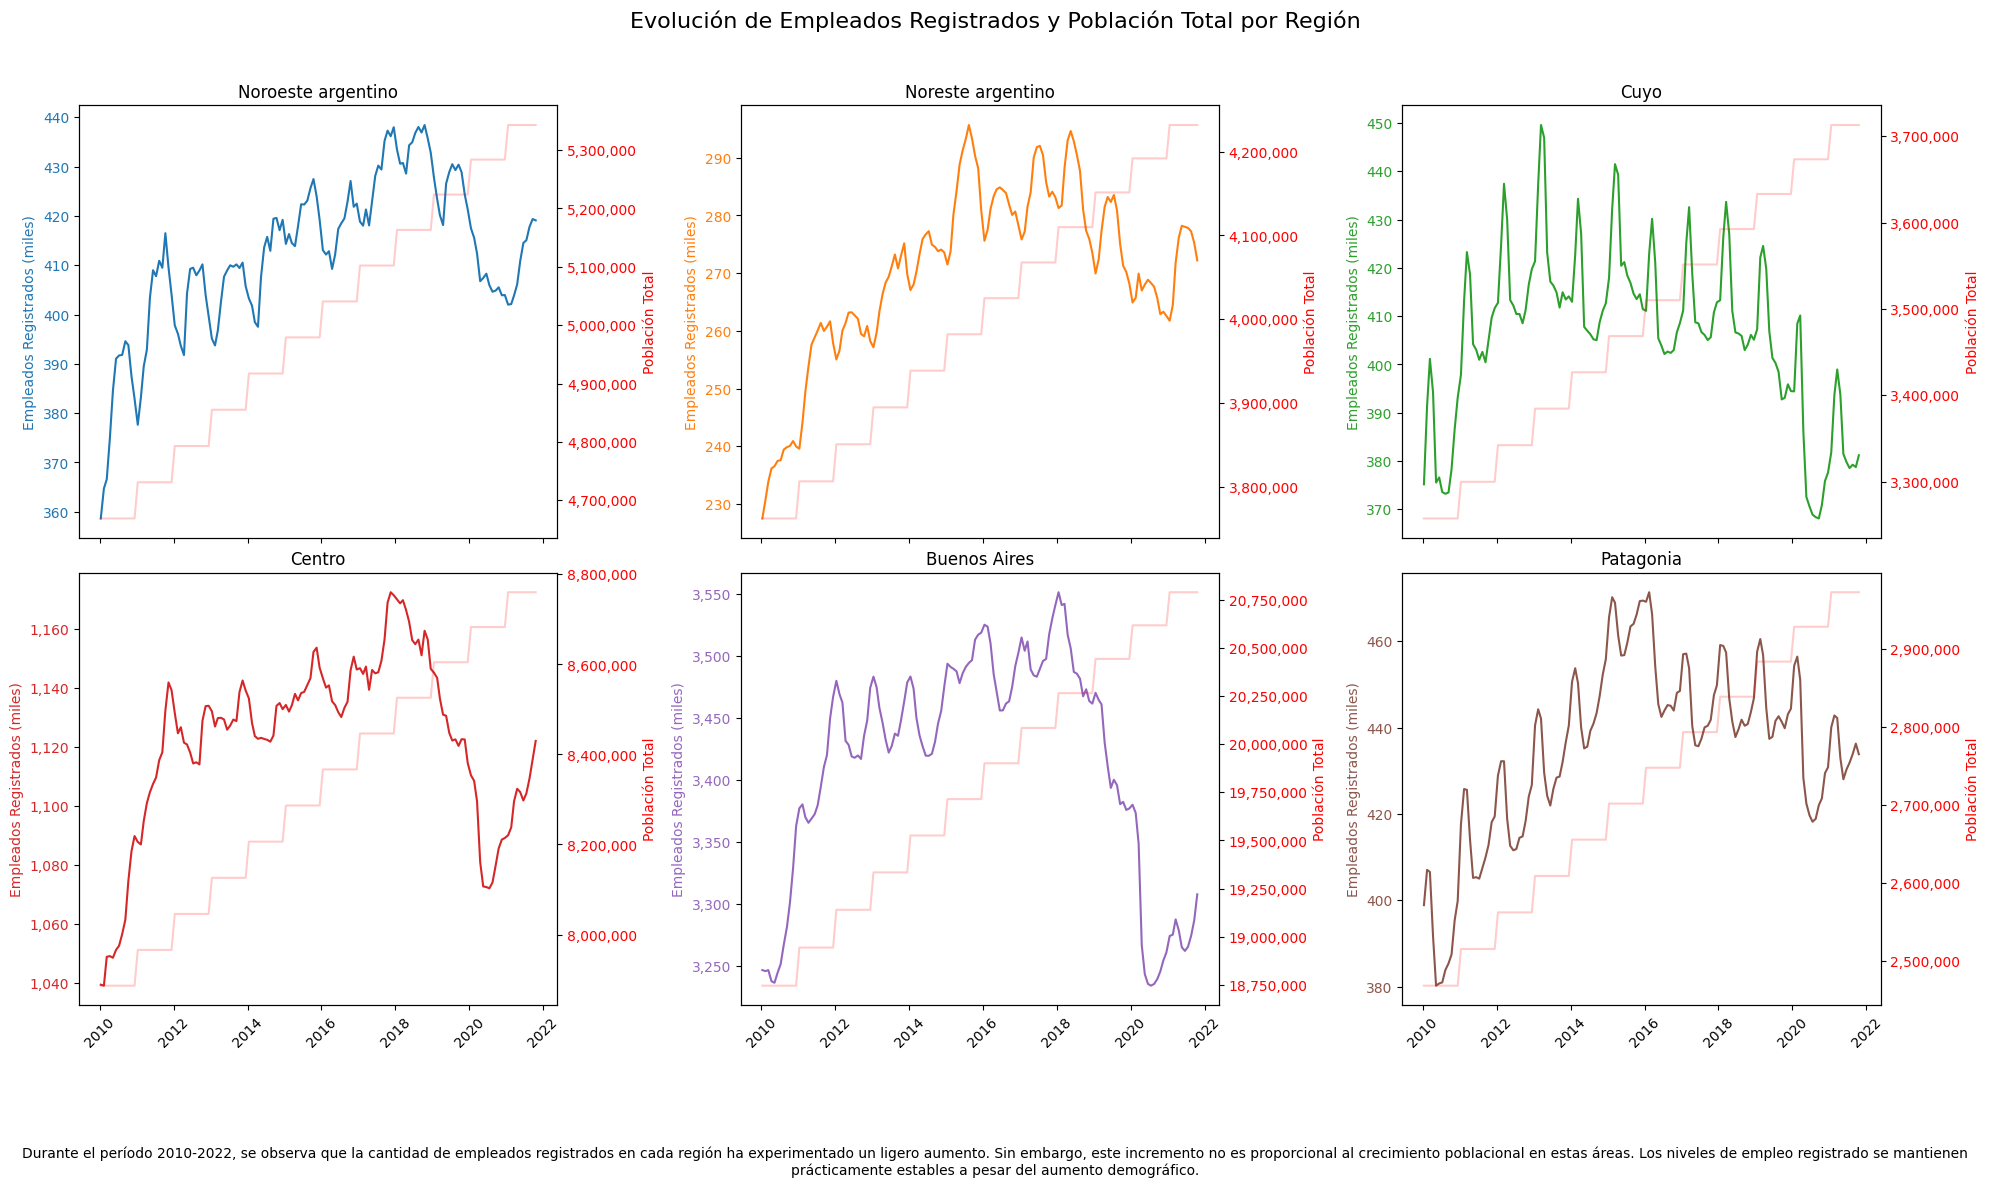

In [38]:
df_region = df_empleo_poblacion.groupby(['region', 'fecha']).agg({
    'empleados_registrados_miles': 'sum',
    'poblacion_total': 'sum'
}).reset_index()

fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharex=True)
axes = axes.flatten()

for index, (region, datos) in enumerate(regiones.items()):
    ax = axes[index]
    data = df_region[df_region['region'] == region]
    
    ax.plot(data['fecha'], data['empleados_registrados_miles'], color=datos['color'])
    ax.set_ylabel('Empleados Registrados (miles)', color=datos['color'])
    ax.tick_params(axis='y', labelcolor=datos['color'])
    
    ax_poblacion = ax.twinx()
    ax_poblacion.plot(data['fecha'], data['poblacion_total'], color='red', alpha=0.2)
    ax_poblacion.set_ylabel('Población Total', color='red')
    ax_poblacion.tick_params(axis='y', labelcolor='red')
    
    ax.set_title(datos['nombre'])
    ax.tick_params(axis='x', rotation=45)
    
    formato_numerico = plt.FuncFormatter(lambda x, p: format(int(x), ','))
    ax.yaxis.set_major_formatter(formato_numerico)
    ax_poblacion.yaxis.set_major_formatter(formato_numerico)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, top=0.9)
fig.suptitle('Evolución de Empleados Registrados y Población Total por Región', fontsize=16)
plt.figtext(0.5, 0.02, 'Durante el período 2010-2022, se observa que la cantidad de empleados registrados en cada región ha experimentado un ligero aumento. Sin embargo, este incremento no es proporcional al crecimiento poblacional en estas áreas. Los niveles de empleo registrado se mantienen prácticamente estables a pesar del aumento demográfico.', ha='center', va='center', wrap=True)
plt.show()